# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:

lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
list_of_cities = []
clouds = []
countries = []
date = []
humidity = []
lats = []
langs = []
max_temp = []
wspeed = []
counter = 0
counter1 = 1

print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        list_of_cities.append(response["name"])
        clouds.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        langs.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wspeed.append(response["wind"]["speed"])
        if counter > 49:
            counter = 0
            counter1 = counter1 + 1
        
        else:
            counter = counter + 1
        
        print(f"Processing Record {counter} of Set {counter1} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Moving to next.")
        

        

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : mackay
Processing Record 2 of Set 1 : ippy
Processing Record 3 of Set 1 : dikson
Processing Record 4 of Set 1 : mataura
Processing Record 5 of Set 1 : vaini
Processing Record 6 of Set 1 : vila franca do campo
Processing Record 7 of Set 1 : radhanpur
Processing Record 8 of Set 1 : ushuaia
Processing Record 9 of Set 1 : vila velha
Processing Record 10 of Set 1 : tuktoyaktuk
Processing Record 11 of Set 1 : bosaso
Processing Record 12 of Set 1 : lebu
City not found. Moving to next.
Processing Record 13 of Set 1 : khatanga
Processing Record 14 of Set 1 : komsomolskiy
Processing Record 15 of Set 1 : westport
Processing Record 16 of Set 1 : atuona
Processing Record 17 of Set 1 : jamestown
Processing Record 18 of Set 1 : chuy
Processing Record 19 of Set 1 : sinnamary
Processing Record 20 of Set 1 : victoria
Processing Record 21 of Set 1 : kapaa
Processing Record 22 of Set 1 : barrow
Processing Record 23 of

Processing Record 33 of Set 4 : pilar
Processing Record 34 of Set 4 : pisco
Processing Record 35 of Set 4 : berlevag
Processing Record 36 of Set 4 : grand gaube
Processing Record 37 of Set 4 : nacogdoches
Processing Record 38 of Set 4 : vao
Processing Record 39 of Set 4 : coihaique
Processing Record 40 of Set 4 : gushikawa
Processing Record 41 of Set 4 : tazovskiy
Processing Record 42 of Set 4 : camacha
Processing Record 43 of Set 4 : touros
Processing Record 44 of Set 4 : cabo san lucas
Processing Record 45 of Set 4 : miramar
City not found. Moving to next.
Processing Record 46 of Set 4 : kabalo
Processing Record 47 of Set 4 : rio gallegos
Processing Record 48 of Set 4 : longyearbyen
Processing Record 49 of Set 4 : hofn
City not found. Moving to next.
City not found. Moving to next.
Processing Record 50 of Set 4 : la mira
Processing Record 0 of Set 5 : hithadhoo
Processing Record 1 of Set 5 : madang
Processing Record 2 of Set 5 : asosa
Processing Record 3 of Set 5 : houma
Processing R

Processing Record 19 of Set 8 : penon blanco
Processing Record 20 of Set 8 : mubende
Processing Record 21 of Set 8 : launceston
Processing Record 22 of Set 8 : ledziny
Processing Record 23 of Set 8 : mogwase
Processing Record 24 of Set 8 : winchester
Processing Record 25 of Set 8 : la ronge
City not found. Moving to next.
Processing Record 26 of Set 8 : fort-shevchenko
Processing Record 27 of Set 8 : bonthe
Processing Record 28 of Set 8 : port lincoln
City not found. Moving to next.
Processing Record 29 of Set 8 : barao de melgaco
Processing Record 30 of Set 8 : staropesterevo
Processing Record 31 of Set 8 : kailua
Processing Record 32 of Set 8 : padang
Processing Record 33 of Set 8 : acarau
Processing Record 34 of Set 8 : walvis bay
Processing Record 35 of Set 8 : machinga
Processing Record 36 of Set 8 : dhidhdhoo
Processing Record 37 of Set 8 : chase
Processing Record 38 of Set 8 : sawakin
Processing Record 39 of Set 8 : bafoulabe
Processing Record 40 of Set 8 : luanda
City not found

Processing Record 44 of Set 11 : cayenne
Processing Record 45 of Set 11 : santa cruz
Processing Record 46 of Set 11 : mehamn
Processing Record 47 of Set 11 : usinsk
Processing Record 48 of Set 11 : kenai
Processing Record 49 of Set 11 : lewistown
Processing Record 50 of Set 11 : talaya
Processing Record 0 of Set 12 : umm kaddadah
Processing Record 1 of Set 12 : aykhal
Processing Record 2 of Set 12 : gornopravdinsk
City not found. Moving to next.
Processing Record 3 of Set 12 : kudahuvadhoo
Processing Record 4 of Set 12 : dese
Processing Record 5 of Set 12 : smidovich
Processing Record 6 of Set 12 : sechura
Processing Record 7 of Set 12 : gap
Processing Record 8 of Set 12 : kaeo
Processing Record 9 of Set 12 : gizo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = pd.DataFrame({ 
                "City" : list_of_cities,
                "Cloudiness" : clouds,
                "Country" : countries,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lats,
                "Lng" : langs,
                "Max Temp" : max_temp,
                "Wind Speed" : wspeed
    })

In [5]:
weather_dict.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [6]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ponta do Sol,15,PT,1635041391,63,32.6667,-17.1000,70.43,5.95
1,Busselton,99,AU,1635041376,58,-33.6500,115.3333,75.04,6.35
2,Mâncio Lima,55,BR,1635041431,74,-7.6142,-72.8958,79.27,2.95
3,Kahului,1,US,1635041377,69,20.8947,-156.4700,82.42,23.02
4,Faanui,74,PF,1635041431,81,-16.4833,-151.7500,78.12,13.49
...,...,...,...,...,...,...,...,...,...
557,Atar,0,MR,1635041558,19,20.5169,-13.0499,78.26,7.47
558,Tezu,8,IN,1635041559,61,27.9167,96.1667,77.16,1.48
559,Maba,1,CN,1635041559,62,24.6841,113.5984,66.31,5.70
560,Brae,100,GB,1635041550,93,60.3964,-1.3530,51.71,18.34


In [7]:
weather_dict.to_csv("../output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

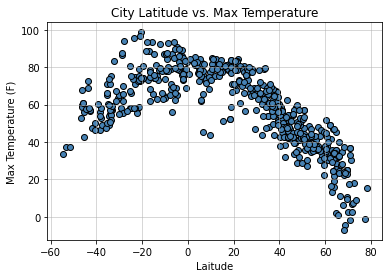

In [8]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

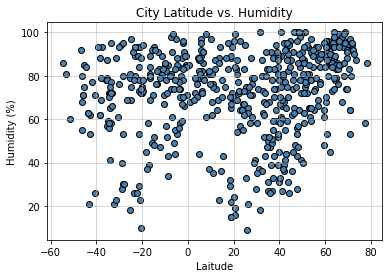

In [15]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

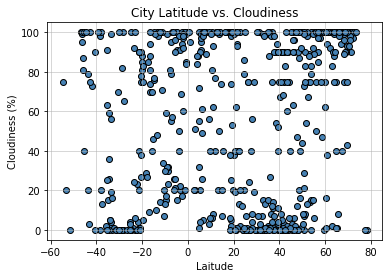

In [24]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

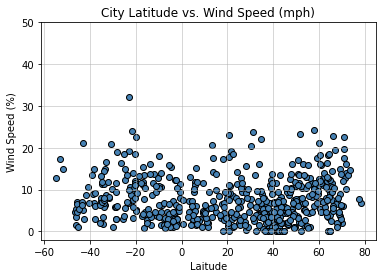

In [11]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [18]:
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


NameError: name 'st' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
annotate(equation, -30, 50)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 40, 15)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -30, 40)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 40, 20)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -30, 15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")